In [103]:
import numpy as np

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


In [104]:
import re
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ')
regex_unwantend = re.compile(r"[,\-'\n]")
regex_other_punctuation = re.compile(r'[:;!?—]')
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7617
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 295
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [105]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

for sentence in sentences:
    print(sentence)
    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()
words = [w.strip().lower() for w in words if w.strip()]
words = list(set(words))
print(words)

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
and i pray the being who always was of old and has now been by me revealed to grant that my words may endure in so far as they have been spoken truly and acceptably to him
but if unintentionally i have said anything wrong i pray that he will impose upon me a just retribution and the just retribution of him who errs is that he should be set right
wishing then to speak truly in future concerning the generation of the gods i pray him to give me knowledge which of all medicines is the most perfect and best
and now having offered my prayer i deliver up the argument to critias who is to speak next according to our agreement
and i timaeus accept the trust and as you at first said that you were going to speak of high matters and begged that some forbearance might be shown to you i too ask the same or greater forbearance for what i am about to say
and although i very well know t

In [106]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list]

# stem words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words = list(set(stemmed_words))


[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# select which words to use
relevant_words = filtered_words

In [108]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i, sentence in enumerate(sentences):
    for j, word in enumerate(relevant_words):
        term_sentence_matrix[j, i] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i in range(len(relevant_words)):
    normalized_term_sentence_matrix[i] = term_sentence_matrix[i] / np.linalg.norm(term_sentence_matrix[i])
    
print(term_sentence_matrix)
print(term_sentence_matrix.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1595, 288)


In [109]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix)
rank = 10
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank])
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank
print(term_sentence_matrix_rank)

[[ 2.05286846e-03  3.96294659e-03  3.41637802e-03 ...  2.62901834e-03
   5.60828999e-03  7.02870192e-03]
 [ 7.79285564e-04  1.22093155e-03  1.40198245e-03 ...  1.25482387e-03
   2.14891838e-03  2.46066236e-03]
 [ 1.08534626e-03  1.55350970e-03  1.73119391e-03 ...  1.41577612e-03
   2.45994841e-03  2.82073152e-03]
 ...
 [ 1.67511517e-03  2.45744725e-03  2.53860294e-03 ...  1.54833277e-03
   4.58910508e-03  4.54217760e-03]
 [ 2.52818111e-03  1.87151367e-04  3.69673609e-03 ...  1.06794607e-03
   9.48026325e-06  2.43783727e-04]
 [ 3.34994986e-03 -1.94830790e-03 -1.73746522e-03 ...  1.08270899e-03
  -8.87514718e-04  1.80437760e-03]]


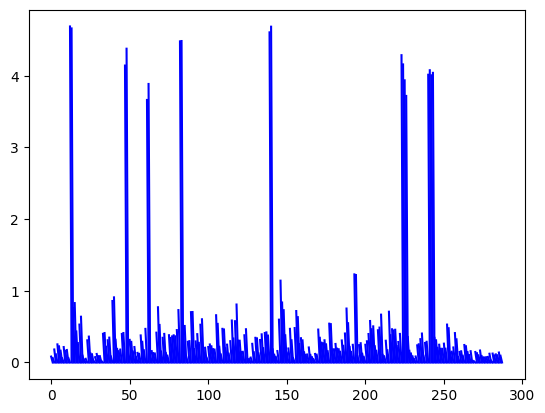

In [110]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
for i in range(len(sentences)-1):
    plt.plot([i, i+1], [np.linalg.norm(term_sentence_matrix_rank[:, i] - term_sentence_matrix_rank[:, i+1]), 0], "b")

In [111]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids
    centroids = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



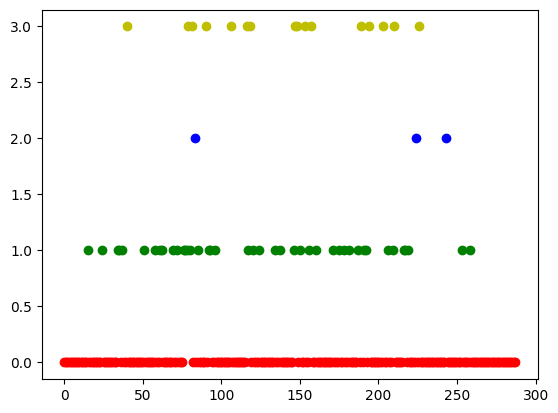

In [112]:
# plot the data with the k-means clustering
k = 4
labels = kmeans(term_sentence_matrix_rank.T, k)
colors = ['r', 'g', 'b','y','orange', 'purple']
for i in range(len(sentences)):
    plt.scatter(i, labels[i], color=colors[labels[i]])

In [113]:
# get "topics" from centroids
centroids = []
for label in range(k):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for i, centroid in enumerate(centroids):
    print("Topic", i)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
us 0.015091932638073858
go 0.013097331186755844
din 0.01295206051446639
ten 0.01259318496023774
one 0.012469012523443287
art 0.012462075337928652
red 0.012363643833975129
tin 0.012169224970245286
able 0.012046104319124415
man 0.01154174760789546
Topic 1
us 0.04462958936309683
one 0.04307150072707312
red 0.04015884605008503
testimony 0.03800159549041676
belongs 0.03800159549041676
associate 0.03800159549041676
distinction 0.03800159549041676
female 0.03800159549041676
sex 0.03800159549041676
armour 0.03800159549041676
Topic 2
according 0.33261377479524573
punish 0.3301959508124616
rule 0.3226706846798486
offend 0.3129271312987661
drew 0.31292713129876604
otherwise 0.312927131298766
swore 0.312927131298766
cups 0.312927131298766
pouring 0.312927131298766
obey 0.312927131298766
Topic 3
one 0.09511667871673585
red 0.08055473958523213
pass 0.07569789936971008
us 0.07056994449428607
round 0.06987378920935271
sea 0.06946997538170345
king 0.06763776146813624
art 0.06664107267452148
lar

In [114]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1595,)
(288,)


In [115]:
# show most salient words
word_saliency = {}
for i, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[i])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.0010425708997394336
0.06575828699438856 	 excepting
0.06575828699438856 	 quest
0.034812448201951784 	 cithaeron
0.034812448201951784 	 labours
0.03423788712968381 	 bulls
0.03423788712968381 	 length
0.02685288816701016 	 sister
0.02685288816701016 	 gave
0.026362521204905783 	 multitude
0.022074648784592605 	 watch
0.022074648784592605 	 punishment
0.02106647455951841 	 drew
0.02106647455951841 	 yesterday
0.0194540633577703 	 towers
0.0194540633577703 	 leading
0.017271183891371333 	 might
0.01711826694039312 	 manifestly
0.015527702095240395 	 largest
0.01545522000307536 	 hoping
0.015439100508585137 	 reflection
0.015439100508585137 	 warning
0.014052059093144708 	 heights
0.01319573036111537 	 isthmus
0.01319573036111537 	 height
0.013076476348253438 	 combatants
0.012239949689298675 	 favour
0.012239949689298675 	 ancient
0.011909804169944178 	 accordance
0.011909804169944178 	 ground
0.011808108780827654 	 theme
0.01113941778764273 	 struggle
0.011139417

In [116]:
# show most salient sentences
sentence_saliency = {}
for i, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[i])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.26307318598824386
this is what i want to suggest to you and at the same time to beg socrates that i may have not less but more indulgence conceded to me in what i am about to say
-----------------
0.14895628123268084
but remember critias that faint heart never yet raised a trophy
-----------------
0.1480379816834589
which favour if i am right in asking i hope that you will be ready to grant
-----------------
0.0865654112832542
and therefore you must go and attack the argument like a man
-----------------
0.0865654112832542
first invoke apollo and the muses and then let us hear you sound the praises and show forth the virtues of your ancient citizens
-----------------
0.04972820718188572
and now making no more excuses i will proceed
-----------------
0.04972820718188572
let me begin by observing first of all that nine thousand was the sum of years which had elapsed since the war which was said to have taken place between those who dwelt outside the pillars of heracles and all who dwel